# Proyek Analisis Data: [Dataset Sharing Bike]
- **Nama:** Rahmat HIdayat
- **Email:** hrahmat094@gmail.com
- **ID Dicoding:** rahmat_hdyt06

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan penyewaan sepeda setiap bulannya pada tahun 2011?
- Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Bagaimana hari kerja mempengaruhi jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda setiap jamnya?

## Import Semua Packages/Library yang Digunakan

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [230]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [231]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- data day.csv dan hour.csv memiliki kesamaan, hour.csv merupakan versi lebih detail dari day.csv

### Assessing Data

#### Menilai tabel `day_df`

In [232]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [233]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [234]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [235]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ditemukan data duplikasi dan missing value pada data
- Ada beberapa feature yang memiliki tipe data yang kurang tepat

#### Menilai tabel `hour_df`

In [236]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [237]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [238]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [239]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan data duplikasi dan missing value pada data
- Ada beberapa feature yang memiliki tipe data yang kurang tepat

### Cleaning Data

#### Membersihkan tabel `day_df`

- Menghapus kolom yang tidak dibutuhkan

In [240]:
drop_cols = ['instant']
day_df.drop(drop_cols, axis=1, inplace=True)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Mengubah tipe data
  - dteday menjadi datetime
  - season, yr, mnth, holiday, weekday, workingday, weathersit menjadi category

In [241]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = pd.Categorical(day_df['season'])
day_df['yr'] = pd.Categorical(day_df['yr'])
day_df['mnth'] = pd.Categorical(day_df['mnth'])
day_df['holiday'] = pd.Categorical(day_df['holiday'])
day_df['weekday'] = pd.Categorical(day_df['weekday'])
day_df['workingday'] = pd.Categorical(day_df['workingday'])
day_df['weathersit'] = pd.Categorical(day_df['weathersit'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

- Mengganti label kategori pada weathersit

In [242]:
weather_labels = {
    1: 'Cerah',
    2: 'Kabut',
    3: 'Gerimis',
    4: 'Hujan Lebat'
}

day_df['weathersit'] = day_df['weathersit'].map(weather_labels)

**Insight:**
- Kolom instant yang tidak terpakai sudah terhapus
- Tipe data yang kurang tepat sudah diganti

#### Membersihkan tabel `hour_df`

- Menghapus kolom yang tidak dibutuhkan

In [243]:
drop_cols = ['instant']
hour_df.drop(drop_cols, axis=1, inplace=True)
hour_df.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


- Mengubah tipe data
  - dteday menjadi datetime
  - season, yr, mnth, hr, holiday, weekday, workingday, weathersit menjadi category

In [244]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = pd.Categorical(hour_df['season'])
hour_df['yr'] = pd.Categorical(hour_df['yr'])
hour_df['mnth'] = pd.Categorical(hour_df['mnth'])
hour_df['hr'] = pd.Categorical(hour_df['hr'])
hour_df['holiday'] = pd.Categorical(hour_df['holiday'])
hour_df['weekday'] = pd.Categorical(hour_df['weekday'])
hour_df['workingday'] = pd.Categorical(hour_df['workingday'])
hour_df['weathersit'] = pd.Categorical(hour_df['weathersit'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(8), dateti

- Mengganti label kategori pada weathersit

In [245]:
weather_labels = {
    1: 'Cerah',
    2: 'Kabut',
    3: 'Gerimis',
    4: 'Hujan Lebat'
}

hour_df['weathersit'] = hour_df['weathersit'].map(weather_labels)

**Insight:**
- Kolom instant yang tidak terpakai sudah terhapus
- Tipe data yang kurang tepat sudah diganti

## Exploratory Data Analysis (EDA)

### Explore data

Melihat rangkuman parameter statistik dari data hour_df

In [246]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Mengelompokkan data berdasarkan weathersit

In [247]:
hour_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

<ipython-input-247-9c88c2e3877b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weathersit").agg({


cnt                                     
             max min        mean         std      sum
weathersit                                           
Cerah        977   1  204.869272  189.487773  2338173
Kabut        957   1  175.165493  165.431589   795952
Gerimis      891   1  111.579281  133.781045   158331
Hujan Lebat  164  23   74.333333   77.925178      223

Mengelompokkan data berdasarkan working day

In [248]:
hour_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

<ipython-input-248-f49f351c8ea7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="workingday").agg({


cnt                                     
            max min        mean         std      sum
workingday                                          
0           783   1  181.405332  172.853832  1000269
1           977   1  193.207754  185.107477  2292410

Filter data untuk tahun 2011

In [249]:
day_2011_df = day_df[day_df["yr"] == 0]
day_2011_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,Kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,Kabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2011-12-27,1,0,12,0,2,1,Kabut,0.325000,0.327633,0.762500,0.188450,103,1059,1162
361,2011-12-28,1,0,12,0,3,1,Cerah,0.299130,0.279974,0.503913,0.293961,255,2047,2302
362,2011-12-29,1,0,12,0,4,1,Cerah,0.248333,0.263892,0.574167,0.119412,254,2169,2423
363,2011-12-30,1,0,12,0,5,1,Cerah,0.311667,0.318812,0.636667,0.134337,491,2508,2999


Mengelompokkan data berdasarkan mnth (bulan) untuk data tahun 2011

In [250]:
day_2011_df.groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

<ipython-input-250-b4eb2a068c91>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_2011_df.groupby(by="mnth").agg({


cnt                                        
       max   min         mean          std     sum
mnth                                              
1     1985   431  1231.903226   372.432665   38189
2     2927  1005  1721.964286   398.508839   48215
3     3239   605  2065.967742   550.971716   64045
4     5312   795  3162.333333  1042.093593   94870
5     5805  2633  4381.322581   572.927883  135821
6     5515  3767  4783.733333   444.447812  143512
7     6043  3285  4559.387097   680.090762  141341
8     5895  1115  4409.387097   809.852401  136691
9     5423  1842  4247.266667   965.377251  127418
10    5511   627  3984.225806  1103.481844  123511
11    4486  1495  3405.566667   788.249290  102167
12    3940   705  2816.870968   958.763187   87323

Mengelompokkan data berdasarkan hr (jam)

In [251]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

<ipython-input-251-7583cdca7111>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="hr").agg({


cnt                                    
    max min        mean         std     sum
hr                                         
0   283   2   53.898072   42.307910   39130
1   168   1   33.375691   33.538727   24164
2   132   1   22.869930   26.578642   16352
3    79   1   11.727403   13.239190    8174
4    28   1    6.352941    4.143818    4428
5    66   1   19.889819   13.200765   14261
6   213   1   76.044138   55.084348   55132
7   596   1  212.064649  161.441936  154171
8   839   5  359.011004  235.189285  261001
9   426  14  219.309491   93.703458  159438
10  539   8  173.668501  102.205413  126257
11  663  10  208.143054  127.495536  151320
12  776   3  253.315934  145.081134  184414
13  760  11  253.661180  148.107657  184919
14  750  12  240.949246  147.271574  175652
15  750   7  251.233196  144.632541  183149
16  783  11  311.983562  148.682618  227748
17  976  15  461.452055  232.656611  336860
18  977  23  425.510989  224.639304  309772
19  743  11  311.523352  161.050359  226789
20  567  11  226.030220  119.670164  164550
21  584   6  172.314560   89.788893  125445
22  502   9  131.335165   69.937782   95612
23  256   2   87.831044   50.846889   63941

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan pengguna setiap bulannya pada tahun 2011?

<ipython-input-252-53692724c734>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_monthly = day_2011_df.groupby(by='mnth').agg({


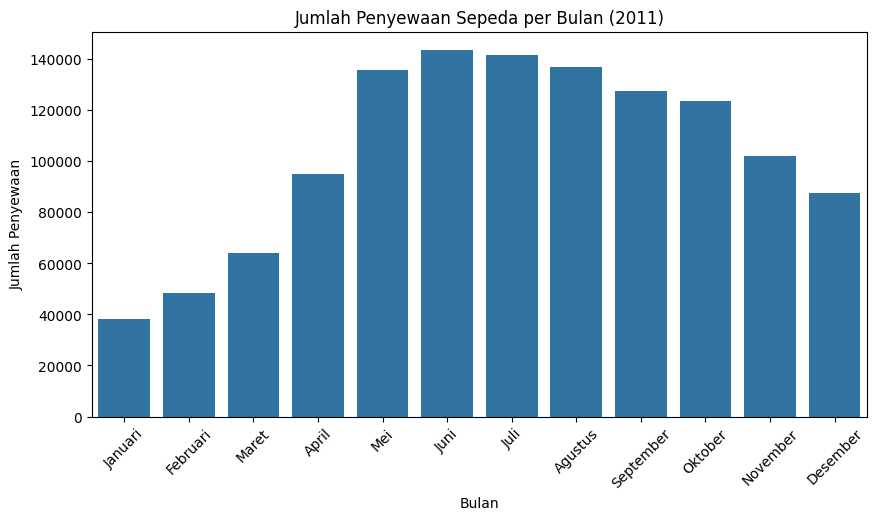

In [252]:
user_monthly = day_2011_df.groupby(by='mnth').agg({
    'cnt': ['sum']
}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=user_monthly, x='mnth', y=('cnt', 'sum'))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan Sepeda per Bulan (2011)')
plt.xticks(ticks=range(12), labels=[
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
])
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?

<ipython-input-253-149e34aaa118>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = hour_df.groupby('weathersit')['cnt'].sum().reset_index()


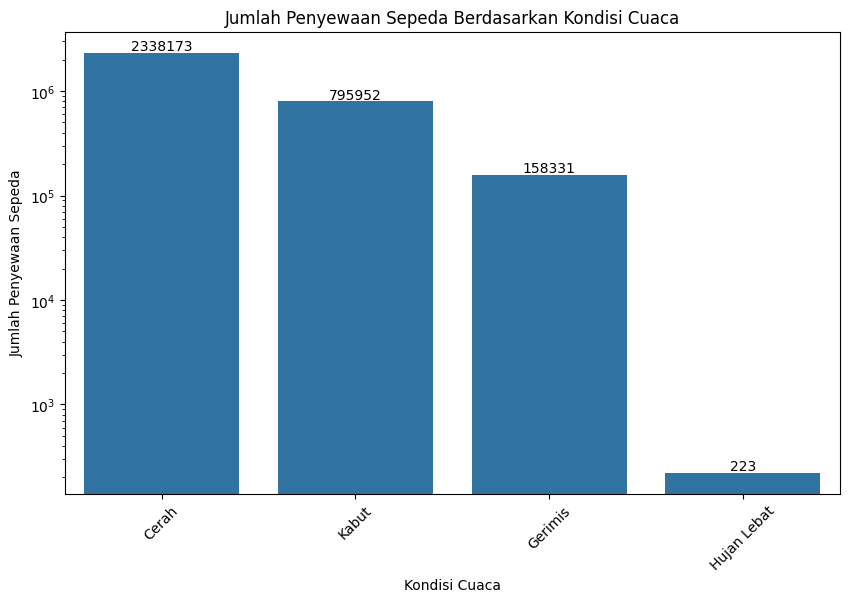

In [253]:
weather_stats = hour_df.groupby('weathersit')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_stats)
plt.yscale('log')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(rotation=45)
for index, row in weather_stats.iterrows():
    plt.text(index, row['cnt'] * 1.05, int(row['cnt']), color='black', ha="center")
plt.show()

### Pertanyaan 3: Bagaimana hari kerja memengaruhi jumlah penyewaan sepeda?


<ipython-input-254-2329df8a76a6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekend_rentals = hour_df.groupby('workingday')['cnt'].sum()


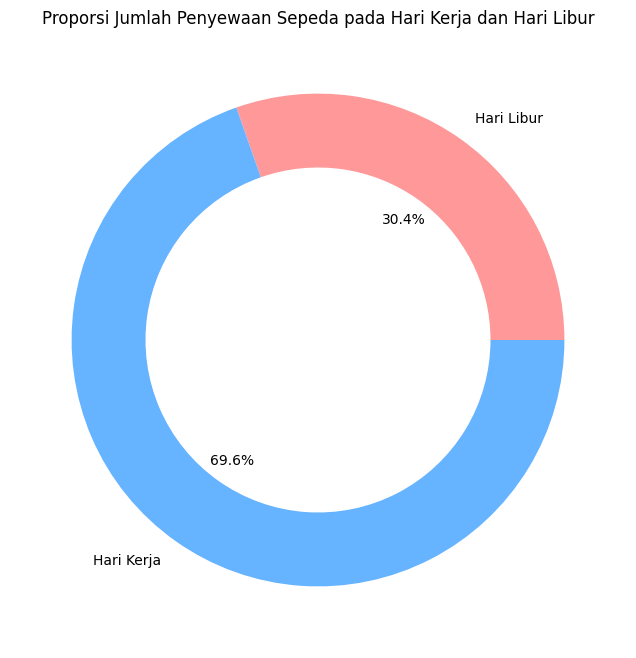

In [254]:
weekend_rentals = hour_df.groupby('workingday')['cnt'].sum()

plt.figure(figsize=(8, 8))
plt.pie(weekend_rentals, labels=['Hari Libur', 'Hari Kerja'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], wedgeprops=dict(width=0.3))
plt.title('Proporsi Jumlah Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
plt.show()


### Pertanyaan 4: Bagaimana tren penyewaan sepeda setiap jamnya?

<ipython-input-255-f21d21c73722>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()


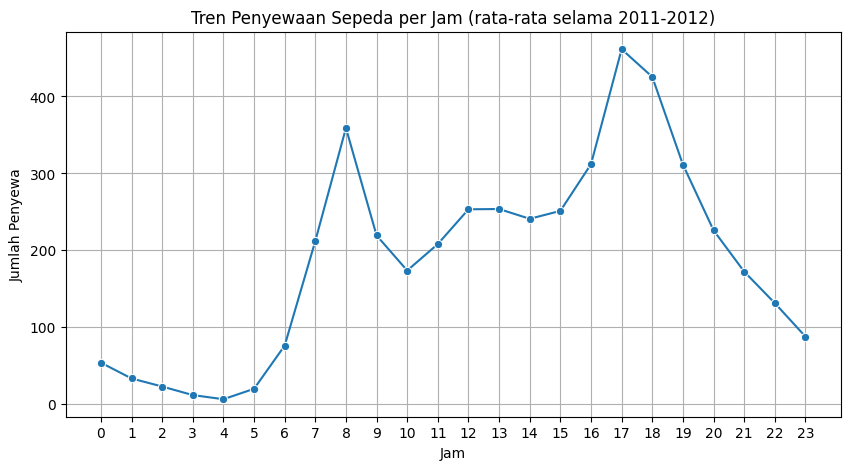

In [255]:
hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o')
plt.title('Tren Penyewaan Sepeda per Jam (rata-rata selama 2011-2012)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan gambar jumlah penyewaan sepeda per bulan selama 2011. Dapat dilihat bahwa tren penyewaan sepeda pada tahun 2011 mengalami fluktuasi. Pada bulan januari hingga juni, tingkat penyewaan sepeda cendereng meningkat. Sedangkan pada bulan juni hingga desember, tingkat penyewaan sepeda cenderung menurun.
- Conclution pertanyaan 2 : Berdasarkan grafik penyewaan sepeda berdasarkan cuaca pada pertanyaan 2. Dapat disimpulkan bahwa cuaca sangat mempengaruhi pelanggan dalam melakukan penyewaan sepeda. Hal itu dapat dilihat dari sedikitnya penyewa sepeda ketika cuaca Hujan deras, butiran es dan badai petir. Berbanding jauh ketika cuaca cerah, sedikit berawan dan berawan sebagian.
- Conclution pertanyaan 3 : Berdasarkan gambar proporsi penyewa sepeda ketika hari kerja dan hari libur, dapat kita simpulkan bahwa hari kerja dan hari libur sangat mempengaruhi pelanggan dalam menyewa sepeda. Pelanggan lebih banyak menyewa pada hari kerja dibandingkan dengan hari libur dengan perbandingan 69.6 % ketika hari kerja dan 30.4% ketika hari libur.
-Conclution pertanyaan 4 : Berdasarkan grafik penyewaan sepeda setiap jam, dapat dilihat bahwa pada jam 17:00 memiliki rata-rata penyewaan terbanyak selama 2011-2012. Sedangkan rata-rata terendah penyewaan adalah pada jam 04:00

In [ ]:
hour_df.to_csv('hour_df.csv', index=False)
day_df.to_csv('day_df.csv', index=False)